In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#read the dataset
df = pd.read_csv('CaseStudy1-data/CaseStudyData.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
PurchaseID                           41476 non-null int64
PurchaseTimestamp                    41476 non-null int64
PurchaseDate                         41476 non-null object
Auction                              41432 non-null object
VehYear                              41432 non-null float64
Make                                 41432 non-null object
Color                                41432 non-null object
Transmission                         41432 non-null object
WheelTypeID                          41432 non-null object
WheelType                            41380 non-null object
VehOdo                               41432 non-null float64
Nationality                          41432 non-null object
Size                                 41432 non-null object
TopThreeAmericanName                 41432 non-null object
MMRAcquisitionAuctionAveragePrice    41416 non-null object
MMRAcq

D:\Programs\conda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [178]:
### finding the attibutes of each feature
dataAttributes=pd.DataFrame([df.columns]).transpose()
dataAttributes.columns = ['Features']
series = ['continuous', 'continuous', 'date', 'nominal','continuous', 'nominal', 'nominal', 'nominal', 'integers', 'nominal','continuous', \
         "nominal", 'ordinal','nominal','continuous','continuous','continuous','continuous','continuous','continuous','continuous', \
         'continuous','comtinuous','binary','nominal','nominal','continuous','binary','continuous','binary','binary']
dataAttributes['Attributes'] = pd.Series(series)
dataAttributes

,Features,Attributes
0,PurchaseID,continuous
1,PurchaseTimestamp,continuous
2,PurchaseDate,date
3,Auction,nominal
4,VehYear,continuous
5,Make,nominal
6,Color,nominal
7,Transmission,nominal
8,WheelTypeID,integers
9,WheelType,nominal


#### Copying the data

In [179]:
# before exploring the data, we will make a copy of the original data named df1
df1=df

#### 2. Did you have to fix any data quality problems? Detail them.

In [180]:
# find the missing data for all features
MissingData = df.isnull().sum()
print(MissingData.sort_values(ascending = False))


# there are 16 columns that are uniformly has missing data
# drop the missing values of subset columns total 44 instances
print('\n\n ********************Dropping the missing data***************************')
df1=df1.dropna(subset=['PRIMEUNIT', 'AUCGUART','VehYear','Make','Color','Transmission','WheelTypeID','WarrantyCost', \
               'VehOdo','Nationality','Size','TopThreeAmericanName','IsOnlineSale','VehBCost','VNST','Auction'])
df1.info()

MMRCurrentRetailRatio                360
MMRAcquisitonRetailCleanPrice        149
WheelType                             96
MMRCurrentRetailCleanPrice            67
MMRCurrentRetailAveragePrice          67
MMRAcquisitionAuctionAveragePrice     60
MMRAcquisitionAuctionCleanPrice       47
MMRCurrentAuctionAveragePrice         47
MMRCurrentAuctionCleanPrice           47
MMRAcquisitionRetailAveragePrice      47
PRIMEUNIT                             44
AUCGUART                              44
VehYear                               44
Make                                  44
Color                                 44
Transmission                          44
WheelTypeID                           44
WarrantyCost                          44
VehOdo                                44
Nationality                           44
Size                                  44
TopThreeAmericanName                  44
IsOnlineSale                          44
VehBCost                              44
VNST            

#### Auction 

['OTHER' 'MANHEIM' 'ADESA']
MANHEIM    22168
ADESA      11086
OTHER       8178
Name: Auction, dtype: int64


Normalised count (percentage) of auction company with kick value prediction
IsBadBuy  Auction
0         MANHEIM    0.541825
          ADESA      0.258657
          OTHER      0.199518
1         MANHEIM    0.489469
          ADESA      0.327493
          OTHER      0.183038
Name: Auction, dtype: float64


Text(0.5,1,'Auction company associated with kick ')

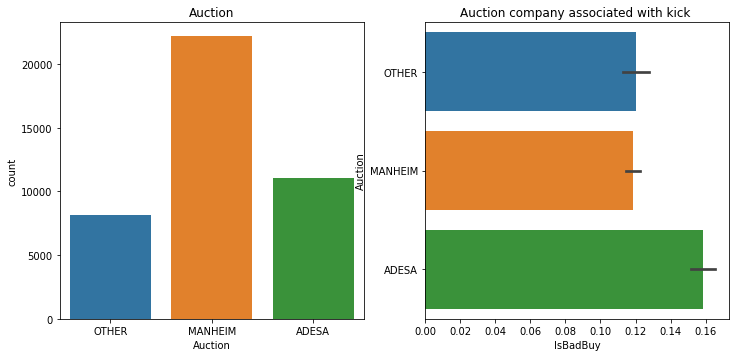

In [212]:
print(df1['Auction'].unique())
print(df1['Auction'].value_counts())

# ['OTHER' 'MANHEIM' nan 'ADESA']
# there are  44 nan values, since its only small proportion we will assign 'MANHEIM' 
# as the auction company as they hold the highest number

#df1['Auction'].replace(np.nan, 'MANHEIM')
#print(df1['Auction'].unique())
#print(df1['Auction'].isnull().values.sum())

print("\n\nNormalised count (percentage) of auction company with kick value prediction")
print(df.groupby(['IsBadBuy'])['Auction'].value_counts(normalize=True))


plt.figure(figsize=(12,12))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Auction')
plt.title("Auction")

plt.subplot(222)
dg = sns.barplot(data=df1, y='Auction', x='IsBadBuy', )
plt.title("Auction company associated with kick ")


#### VehYear

[2008. 2007. 2004. 2006. 2005. 2003. 2009. 2001. 2002. 2010.]
2006.0    9630
2005.0    8682
2007.0    6514
2004.0    5792
2008.0    4177
2003.0    3554
2002.0    1879
2001.0     816
2009.0     387
2010.0       1
Name: VehYear, dtype: int64


Normalised count (percentage) of VehYear with kick value prediction
IsBadBuy  VehYear
0         2006.0     8661
          2005.0     7482
          2007.0     6011
          2004.0     4822
          2008.0     3930
          2003.0     2815
          2002.0     1403
          2001.0      574
          2009.0      368
          2010.0        1
1         2005.0     1200
          2004.0      970
          2006.0      969
          2003.0      739
          2007.0      503
          2002.0      476
          2008.0      247
          2001.0      242
          2009.0       19
Name: VehYear, dtype: int64


Text(0.5,1,'VehYear associated with kick ')

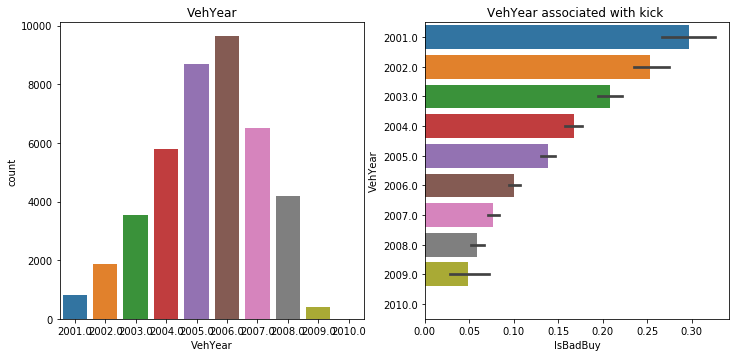

In [175]:
print(df1['VehYear'].unique())
print(df1['VehYear'].value_counts())

print("\n\nNormalised count (percentage) of VehYear with kick value prediction")
print(df.groupby(['IsBadBuy'])['VehYear'].value_counts())

df1['VehYear'] = pd.Categorical(df1['VehYear'])
plt.figure(figsize=(12,12))
plt.subplot(221)
dg = sns.countplot(data=df1, x='VehYear')
plt.title("VehYear")

plt.subplot(222)
dg = sns.barplot(data=df1, y='VehYear', x='IsBadBuy', )
plt.title("VehYear associated with kick ")

# Make

['DODGE' 'CHRYSLER' 'CHEVROLET' 'PONTIAC' 'MITSUBISHI' 'MAZDA' 'SUZUKI'
 'KIA' 'SATURN' 'TOYOTA' 'FORD' 'BUICK' 'JEEP' 'NISSAN' 'INFINITI'
 'HYUNDAI' 'GMC' 'VOLKSWAGEN' 'HONDA' 'MERCURY' 'OLDSMOBILE' 'ACURA'
 'CADILLAC' 'ISUZU' 'LINCOLN' 'SUBARU' 'SCION' 'LEXUS' 'MINI' 'VOLVO']
CHEVROLET     9548
DODGE         7385
FORD          6458
CHRYSLER      5259
PONTIAC       2355
KIA           1337
SATURN        1245
NISSAN        1186
JEEP           985
HYUNDAI        957
SUZUKI         842
TOYOTA         664
MITSUBISHI     569
MAZDA          532
MERCURY        527
BUICK          413
GMC            351
HONDA          263
OLDSMOBILE     146
ISUZU           82
SCION           77
VOLKSWAGEN      73
LINCOLN         54
INFINITI        27
ACURA           19
MINI            19
CADILLAC        17
SUBARU          17
LEXUS           13
VOLVO           12
Name: Make, dtype: int64


Normalised count (percentage) of Make with kick value prediction
IsBadBuy  Make      
0         CHEVROLET     0.238085
     

Text(0.5,1,'Make associated with kick ')

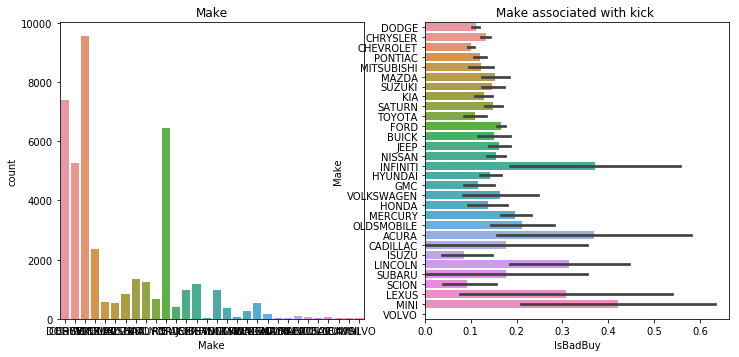

In [202]:
print(df1['Make'].unique())
print(df1['Make'].value_counts())

print("\n\nNormalised count (percentage) of Make with kick value prediction")
print(df.groupby(['IsBadBuy'])['Make'].value_counts(normalize=True))

plt.figure(figsize=(12,12))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Make')
plt.title("Make")

plt.subplot(222)
dg = sns.barplot(data=df1, y='Make', x='IsBadBuy', )
plt.title("Make associated with kick ")

#### Color

In [ ]:
# df['Color'] explore
print(df1['Color'].unique())
print(df1['Color'].value_counts())
# found missing values
#['RED' 'SILVER' 'WHITE' 'BLUE' 'BEIGE' 'BLACK' 'GREEN' 'GREY' 'NOT AVAIL'
#'GOLD' 'PURPLE' 'ORANGE' 'MAROON' 'YELLOW' 'OTHER' 'BROWN' '?']
# replace '?' with SILVER as the highest number 

D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


IsBadBuy  Color    
0         SILVER       0.205617
          WHITE        0.166607
          BLUE         0.142318
          BLACK        0.107827
          GREY         0.103446
          RED          0.087864
          GOLD         0.072144
          GREEN        0.042865
          MAROON       0.025148
          BEIGE        0.021405
          ORANGE       0.006377
          BROWN        0.005822
          PURPLE       0.004686
          OTHER        0.003327
          YELLOW       0.003299
          NOT AVAIL    0.001248
1         SILVER       0.210811
          WHITE        0.164212
          BLUE         0.134576
          GREY         0.096365
          BLACK        0.093756
          RED          0.091705
          GOLD         0.085182
          GREEN        0.046598
          MAROON       0.024604
          BEIGE        0.022740
          BROWN        0.007269
          PURPLE       0.006710
          ORANGE       0.004660
          YELLOW       0.004101
          NOT AVAIL 

Text(0.5,1,'Color associated with kick ')

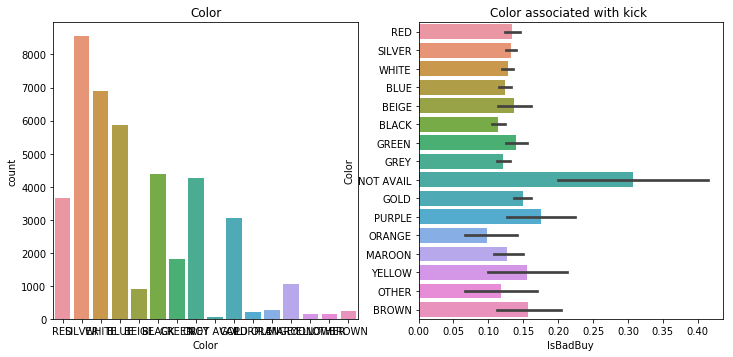

In [140]:
df1['Color'] = df1['Color'].replace('?', 'SILVER')
#print(df1['Color'].unique())

#print("\n\nNormalised count (Color) of auction company with kick value prediction")
print(df1.groupby(['IsBadBuy'])['Color'].value_counts(normalize=True))

plt.figure(figsize=(12,12))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Color',)
plt.title("Color")

plt.subplot(222)
dg = sns.barplot(data=df1, y='Color', x='IsBadBuy', )
plt.title("Color associated with kick ")

#### Transmission

####
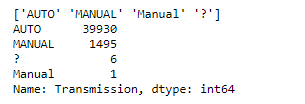

Imputation by majority value
replace '?' with 'AUTO'
replace 'Manual' with 'MANUAL'

D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  




Normalised count (Transmission)  with kick value prediction
IsBadBuy  Transmission
0         AUTO            0.963512
          MANUAL          0.036488
1         AUTO            0.966449
          MANUAL          0.033551
Name: Transmission, dtype: float64


Text(0.5,1,'Transmission associated with kick ')

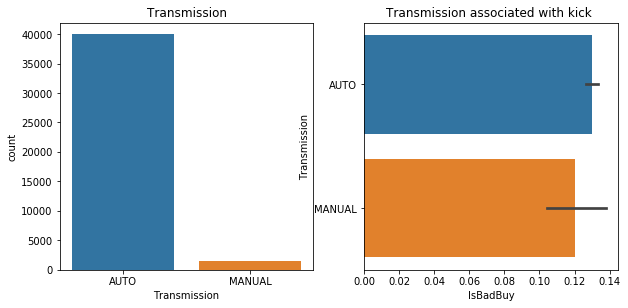

In [138]:
# df['Transmission'] explore
#print(df1['Transmission'].unique())
#print(df1['Transmission'].value_counts())

df1['Transmission'] = df1['Transmission'].replace('?', 'AUTO')
df1['Transmission'] = df1['Transmission'].replace('Manual', 'MANUAL')
print("\n\nNormalised count (Transmission)  with kick value prediction")
print(df1.groupby(['IsBadBuy'])['Transmission'].value_counts(normalize=True))

plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Transmission',)
plt.title("Transmission")

plt.subplot(222)
dg = sns.barplot(data=df1, y='Transmission', x='IsBadBuy', )
plt.title("Transmission associated with kick ")

#### WheelTypeID

In [214]:
print(df1['WheelTypeID'].unique())
print(df1['WheelTypeID'].value_counts())

['2' '1' '3' '0']
1    22201
2    18791
3      437
0        3
Name: WheelTypeID, dtype: int64


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until




Normalised count (percentage) of auction company with kick value prediction
IsBadBuy  WheelTypeID
0         1              0.501982
          2              0.477667
          3              0.010508
          ?              0.009787
          0              0.000055
1         1              0.432619
          2              0.291333
          ?              0.265051
          3              0.010811
          0              0.000186
Name: WheelTypeID, dtype: float64


Text(0.5,1,'WheelTypeID associated with kick ')

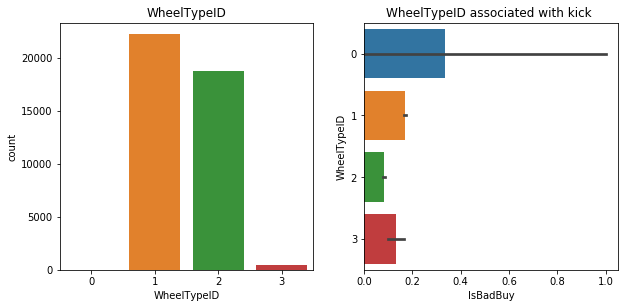

In [217]:
# replace by majority since data is categorical
df1['WheelTypeID'] = df1['WheelTypeID'].replace('?', '1')
df1['WheelTypeID'] = pd.Categorical(df1['WheelTypeID'])
print("\n\nNormalised count (percentage) of auction company with kick value prediction")
print(df.groupby(['IsBadBuy'])['WheelTypeID'].value_counts(normalize=True))

#dg = sns.countplot(data=df1, x='Transmission')
#plt.show()
#ax = sns.boxplot(x="IsBadBuy", y="Auction", data=df1)

plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='WheelTypeID')
plt.title("WheelTypeID")

plt.subplot(222)
dg = sns.barplot(data=df1, y='WheelTypeID', x='IsBadBuy', )
plt.title("WheelTypeID associated with kick ")

#### WheelType

In [116]:
print(df1['WheelType'].unique())
print(df1['WheelType'].value_counts())
print(df1['WheelType'].isnull().values.sum())

['Covers' 'Alloy' '?' 'Special' nan]
Alloy      20406
Covers     18761
?           1777
Special      436
Name: WheelType, dtype: int64
52




Normalised count (percentage) of auction company with kick value prediction
IsBadBuy  WheelType
0         Alloy        0.502082
          Covers       0.477571
          Special      0.010493
          ?            0.009855
1         Alloy        0.432972
          Covers       0.290702
          ?            0.265497
          Special      0.010829
Name: WheelType, dtype: float64


Text(0.5,1,'WheelType associated with kick ')

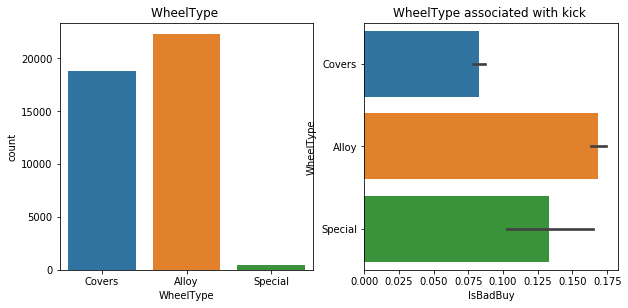

In [121]:
df1['WheelType'] = df1['WheelType'].replace(np.nan, 'Alloy')
df1['WheelType'] = df1['WheelType'].replace('?', 'Alloy')

print("\n\nNormalised count (percentage) of auction company with kick value prediction")
print(df.groupby(['IsBadBuy'])['WheelType'].value_counts(normalize=True))

plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='WheelType')
plt.title("WheelType ")

plt.subplot(222)
dg = sns.barplot(data=df1, y='WheelType', x='IsBadBuy', )
plt.title("WheelType associated with kick ")

#### VehOdo 

In [221]:
print(df1['VehOdo'].unique())
print(df1['VehOdo'].value_counts(bins=10000))
print(df1['VehOdo'].isnull().values.sum())

[51099. 48542. 46318. ... 65399. 45234. 66855.]
(78411.427, 78459.414]      75
(79947.002, 79994.988]      72
(76827.866, 76875.853]      71
(78699.348, 78747.334]      70
(78603.374, 78651.361]      69
(76779.88, 76827.866]       69
(72509.063, 72557.05]       68
(82634.257, 82682.244]      67
(75052.358, 75100.345]      67
(80522.842, 80570.829]      67
(72125.17, 72173.156]       67
(79899.015, 79947.002]      66
(79611.095, 79659.082]      66
(72844.97, 72892.957]       66
(77691.627, 77739.614]      66
(78843.308, 78891.294]      66
(80570.829, 80618.816]      65
(79515.122, 79563.108]      65
(72701.01, 72748.997]       65
(77499.68, 77547.667]       65
(79083.241, 79131.228]      65
(77883.574, 77931.56]       65
(76204.039, 76252.026]      64
(78507.401, 78555.388]      64
(75628.199, 75676.185]      64
(84841.645, 84889.632]      64
(75244.305, 75292.292]      63
(73324.837, 73372.824]      63
(74380.545, 74428.531]      63
(74236.584, 74284.571]      63
                      

Text(0.5,1,'VehOdo that is KICK')

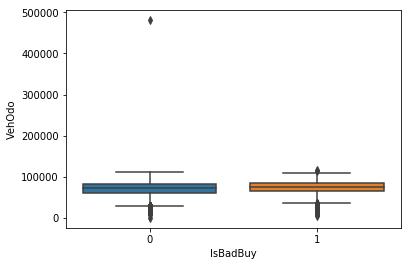

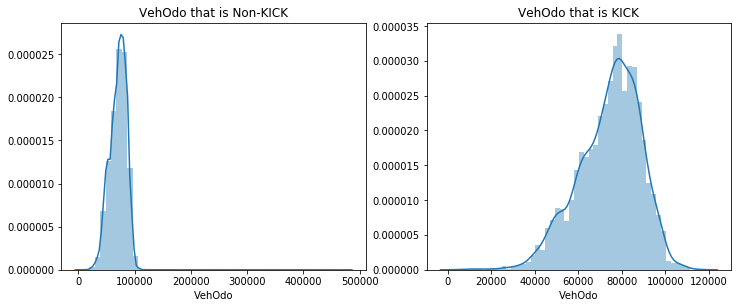

In [222]:
ax = sns.boxplot(x="IsBadBuy", y="VehOdo", data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].VehOdo)
plt.title('VehOdo that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].VehOdo)
plt.title('VehOdo that is KICK')

#### Nationality

In [236]:
print(df1['Nationality'].unique())
print(df1['Nationality'].value_counts())
print(df1['Nationality'].isnull().values.sum())

['AMERICAN' 'OTHER ASIAN' 'USA' 'TOP LINE ASIAN' 'OTHER' '?']
AMERICAN          34616
OTHER ASIAN        4474
TOP LINE ASIAN     2110
USA                 125
OTHER               104
?                     3
Name: Nationality, dtype: int64
0


In [110]:
# replace '?' and 'USA' with 'AMERICAN'
df1['Nationality'] = df1['Nationality'].replace('?', 'AMERICAN')
df1['Nationality'] = df1['Nationality'].replace('USA', 'AMERICAN')
print(df1['Nationality'].unique())

['AMERICAN' 'OTHER ASIAN' 'TOP LINE ASIAN' 'OTHER']




Normalised count (percentage) of Nationality with kick value prediction
IsBadBuy  Nationality   
0         AMERICAN          0.840408
          OTHER ASIAN       0.106857
          TOP LINE ASIAN    0.050406
          OTHER             0.002329
1         AMERICAN          0.826281
          OTHER ASIAN       0.115564
          TOP LINE ASIAN    0.054427
          OTHER             0.003728
Name: Nationality, dtype: float64


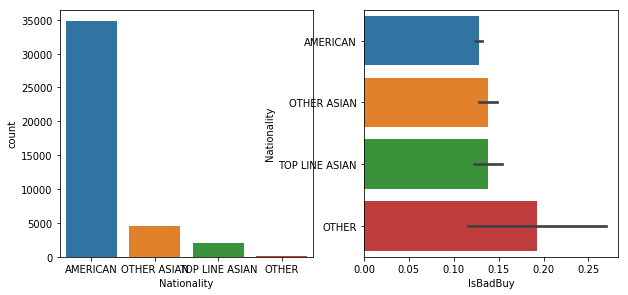

In [112]:
print("\n\nNormalised count (percentage) of Nationality with kick value prediction")
print(df1.groupby(['IsBadBuy'])['Nationality'].value_counts(normalize=True))

plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Nationality')

plt.subplot(222)
dg = sns.barplot(data=df1, y='Nationality', x='IsBadBuy')

#### Size

In [249]:
print(df1['Size'].unique())
print(df1['Size'].value_counts())
print(df1['Size'].isnull().values.sum())

['MEDIUM' 'COMPACT' 'LARGE' 'MEDIUM SUV' 'SPECIALTY' 'CROSSOVER' 'VAN'
 'LARGE SUV' 'SMALL TRUCK' 'LARGE TRUCK' 'SMALL SUV' 'SPORTS' '?']
MEDIUM         17540
LARGE           4968
MEDIUM SUV      4569
COMPACT         4035
VAN             3367
LARGE TRUCK     1897
SMALL SUV       1332
SPECIALTY        998
CROSSOVER        974
LARGE SUV        830
SMALL TRUCK      494
SPORTS           425
?                  3
Name: Size, dtype: int64
0


In [108]:
# replace '?' and 'USA' with 'AMERICAN'
df1['Size'] = df1['Size'].replace('?', 'MEDIUM')
print(df1['Size'].unique())

['MEDIUM' 'COMPACT' 'LARGE' 'MEDIUM SUV' 'SPECIALTY' 'CROSSOVER' 'VAN'
 'LARGE SUV' 'SMALL TRUCK' 'LARGE TRUCK' 'SMALL SUV' 'SPORTS']




Normalised count (percentage) of Nationality with kick value prediction
IsBadBuy  Size       
0         MEDIUM         0.427233
          LARGE          0.125405
          MEDIUM SUV     0.106552
          COMPACT        0.093132
          VAN            0.081044
          LARGE TRUCK    0.046081
          SMALL SUV      0.031636
          SPECIALTY      0.024870
          CROSSOVER      0.023845
          LARGE SUV      0.018965
          SMALL TRUCK    0.011617
          SPORTS         0.009621
1         MEDIUM         0.397763
          MEDIUM SUV     0.135322
          COMPACT        0.126002
          LARGE          0.082945
          VAN            0.082759
          LARGE TRUCK    0.043802
          SMALL SUV      0.035601
          LARGE SUV      0.027213
          CROSSOVER      0.021249
          SPECIALTY      0.018826
          SPORTS         0.014539
          SMALL TRUCK    0.013979
Name: Size, dtype: float64


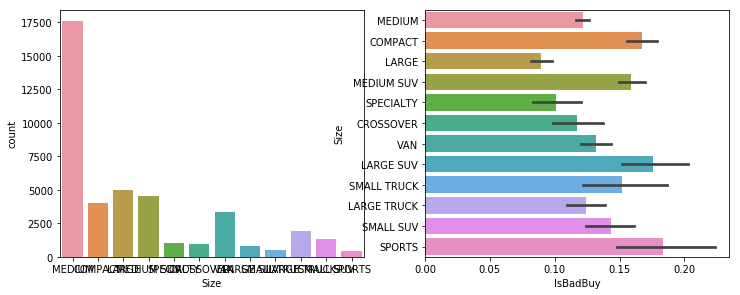

In [109]:
print("\n\nNormalised count (percentage) of Nationality with kick value prediction")
print(df1.groupby(['IsBadBuy'])['Size'].value_counts(normalize=True))

plt.figure(figsize=(12,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Size')
plt.subplot(222)
dg = sns.barplot(data=df1, y='Size', x='IsBadBuy')

#### TopThreeAmericanName

In [255]:
print(df1['TopThreeAmericanName'].unique())
print(df1['TopThreeAmericanName'].value_counts())
print(df1['TopThreeAmericanName'].isnull().values.sum())

['CHRYSLER' 'GM' 'OTHER' 'FORD' '?']
GM          14075
CHRYSLER    13627
FORD         7039
OTHER        6688
?               3
Name: TopThreeAmericanName, dtype: int64
0


In [103]:
# replace '?' with 'GM'
df1['TopThreeAmericanName'] = df1['TopThreeAmericanName'].replace('?', 'GM')
print(df1['TopThreeAmericanName'].unique())

['CHRYSLER' 'GM' 'OTHER' 'FORD']




Normalised count (percentage) of Nationality with kick value prediction
IsBadBuy  TopThreeAmericanName
0         GM                      0.346938
          CHRYSLER                0.331356
          FORD                    0.162115
          OTHER                   0.159592
1         CHRYSLER                0.312395
          GM                      0.291705
          FORD                    0.222181
          OTHER                   0.173719
Name: TopThreeAmericanName, dtype: float64


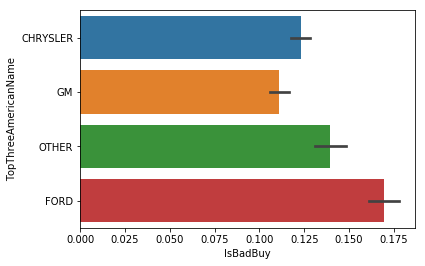

In [104]:
print("\n\nNormalised count (percentage) of Nationality with kick value prediction")
print(df1.groupby(['IsBadBuy'])['TopThreeAmericanName'].value_counts(normalize=True))
dg = sns.barplot(data=df1, y='TopThreeAmericanName', x='IsBadBuy')

#### MMRAcquisitionAuctionAveragePrice

In [183]:
print(df1['MMRAcquisitionAuctionAveragePrice'].isnull().values.sum())

16


0


Normalised count (percentage) of MMRAcquisitionAuctionAveragePrice with kick value prediction


Text(0.5,1,'MMRAcquisitionAuctionAveragePrice that is KICK')

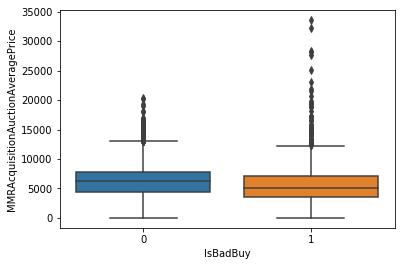

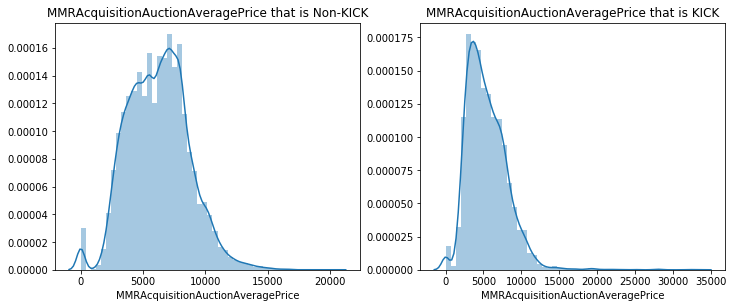

In [98]:

#print(df1['MMRAcquisitionAuctionAveragePrice'].unique())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts())
# replace '?' with '0'
df1['MMRAcquisitionAuctionAveragePrice'] = df1['MMRAcquisitionAuctionAveragePrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRAcquisitionAuctionAveragePrice'] = pd.to_numeric(df1['MMRAcquisitionAuctionAveragePrice'])
df1['MMRAcquisitionAuctionAveragePrice'].unique()

# fill the missing value with the mean of the column
df1['MMRAcquisitionAuctionAveragePrice'] = df1['MMRAcquisitionAuctionAveragePrice'].fillna((df1['MMRAcquisitionAuctionAveragePrice'].mean()))
print(df1['MMRAcquisitionAuctionAveragePrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))
print("\n\nNormalised count (percentage) of MMRAcquisitionAuctionAveragePrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRAcquisitionAuctionAveragePrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRAcquisitionAuctionAveragePrice)
plt.title('MMRAcquisitionAuctionAveragePrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRAcquisitionAuctionAveragePrice)
plt.title('MMRAcquisitionAuctionAveragePrice that is KICK')

#### MMRAcquisitionAuctionCleanPrice

In [184]:
print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionCleanPrice'].unique())
#print(df1['MMRAcquisitionAuctionCleanPrice'].value_counts())

3




Normalised count (percentage) of MMRAcquisitionAuctionCleanPrice with kick value prediction


Text(0.5,1,'MMRAcquisitionAuctionCleanPrice that is KICK')

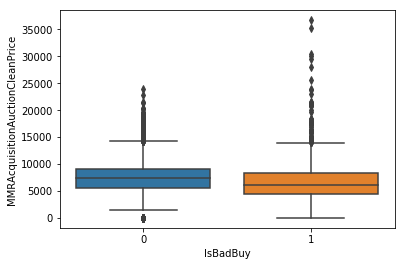

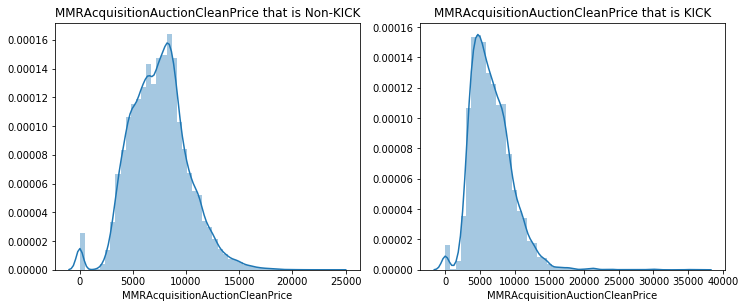

In [97]:
# replace '?' with '0'
df1['MMRAcquisitionAuctionCleanPrice'] = df1['MMRAcquisitionAuctionCleanPrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRAcquisitionAuctionCleanPrice'] = pd.to_numeric(df1['MMRAcquisitionAuctionCleanPrice'])
df1['MMRAcquisitionAuctionCleanPrice'].unique()

# fill the missing value with the mean of the column
df1['MMRAcquisitionAuctionCleanPrice'] = df1['MMRAcquisitionAuctionCleanPrice'].fillna((df1['MMRAcquisitionAuctionCleanPrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRAcquisitionAuctionCleanPrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRAcquisitionAuctionCleanPrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRAcquisitionAuctionCleanPrice)
plt.title('MMRAcquisitionAuctionCleanPrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRAcquisitionAuctionCleanPrice)
plt.title('MMRAcquisitionAuctionCleanPrice that is KICK')

#### MMRAcquisitionRetailAveragePrice

In [185]:
print(df1['MMRAcquisitionRetailAveragePrice'].isnull().values.sum())

3




Normalised count (percentage) of MMRAcquisitionRetailAveragePrice with kick value prediction


Text(0.5,1,'MMRAcquisitionRetailAveragePrice that is KICK')

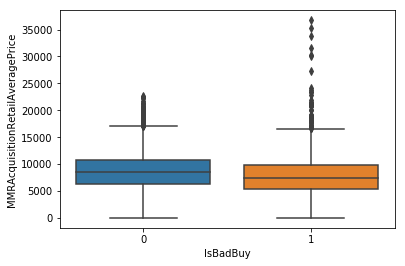

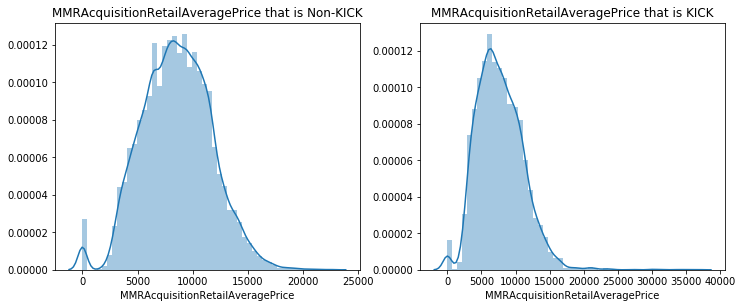

In [96]:
# replace '?' with '0'
df1['MMRAcquisitionRetailAveragePrice'] = df1['MMRAcquisitionRetailAveragePrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRAcquisitionRetailAveragePrice'] = pd.to_numeric(df1['MMRAcquisitionRetailAveragePrice'])
df1['MMRAcquisitionRetailAveragePrice'].unique()

# fill the missing value with the mean of the column
df1['MMRAcquisitionRetailAveragePrice'] = df1['MMRAcquisitionRetailAveragePrice'].fillna((df1['MMRAcquisitionRetailAveragePrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRAcquisitionRetailAveragePrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRAcquisitionRetailAveragePrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRAcquisitionRetailAveragePrice)
plt.title('MMRAcquisitionRetailAveragePrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRAcquisitionRetailAveragePrice)
plt.title('MMRAcquisitionRetailAveragePrice that is KICK')

####  MMRAcquisitonRetailCleanPrice

In [186]:
print(df1['MMRAcquisitonRetailCleanPrice'].isnull().values.sum())

105




Normalised count (percentage) of MMRAcquisitonRetailCleanPrice with kick value prediction


Text(0.5,1,'MMRAcquisitonRetailCleanPrice that is KICK')

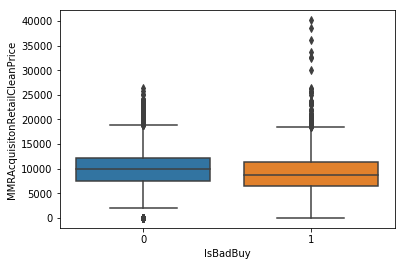

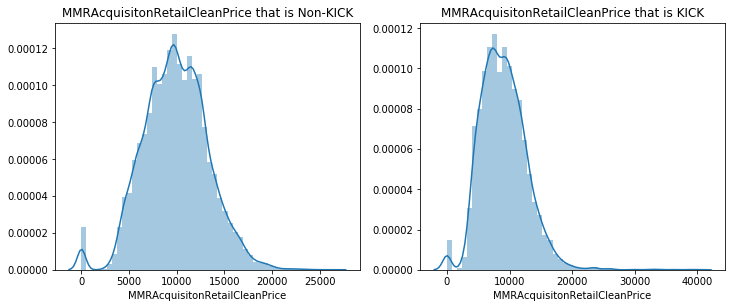

In [95]:
# replace '?' with '0'
df1['MMRAcquisitonRetailCleanPrice'] = df1['MMRAcquisitonRetailCleanPrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRAcquisitonRetailCleanPrice'] = pd.to_numeric(df1['MMRAcquisitonRetailCleanPrice'])
df1['MMRAcquisitonRetailCleanPrice'].unique()

# fill the missing value with the mean of the column
df1['MMRAcquisitonRetailCleanPrice'] = df1['MMRAcquisitonRetailCleanPrice'].fillna((df1['MMRAcquisitonRetailCleanPrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRAcquisitonRetailCleanPrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRAcquisitonRetailCleanPrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRAcquisitonRetailCleanPrice)
plt.title('MMRAcquisitonRetailCleanPrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRAcquisitonRetailCleanPrice)
plt.title('MMRAcquisitonRetailCleanPrice that is KICK')


####  MMRCurrentAuctionAveragePrice

In [187]:
print(df1['MMRCurrentAuctionAveragePrice'].isnull().values.sum())

3




Normalised count (percentage) of MMRCurrentAuctionAveragePrice with kick value prediction


Text(0.5,1,'MMRCurrentAuctionAveragePrice that is KICK')

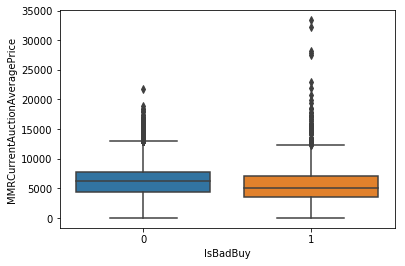

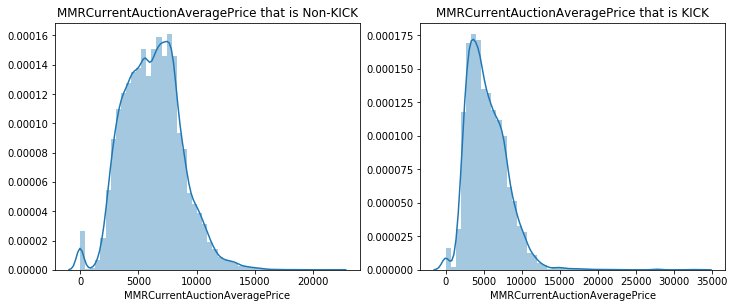

In [94]:
# replace '?' with '0'
df1['MMRCurrentAuctionAveragePrice'] = df1['MMRCurrentAuctionAveragePrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRCurrentAuctionAveragePrice'] = pd.to_numeric(df1['MMRCurrentAuctionAveragePrice'])
df1['MMRCurrentAuctionAveragePrice'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentAuctionAveragePrice'] = df1['MMRCurrentAuctionAveragePrice'].fillna((df1['MMRCurrentAuctionAveragePrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRCurrentAuctionAveragePrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentAuctionAveragePrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentAuctionAveragePrice)
plt.title('MMRCurrentAuctionAveragePrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentAuctionAveragePrice)
plt.title('MMRCurrentAuctionAveragePrice that is KICK')


#### MMRCurrentAuctionCleanPrice

In [188]:
print(df1['MMRCurrentAuctionCleanPrice'].isnull().values.sum())

3




Normalised count (percentage) of MMRCurrentAuctionCleanPrice with kick value prediction


Text(0.5,1,'MMRCurrentAuctionCleanPrice that is KICK')

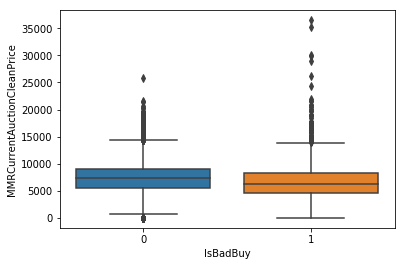

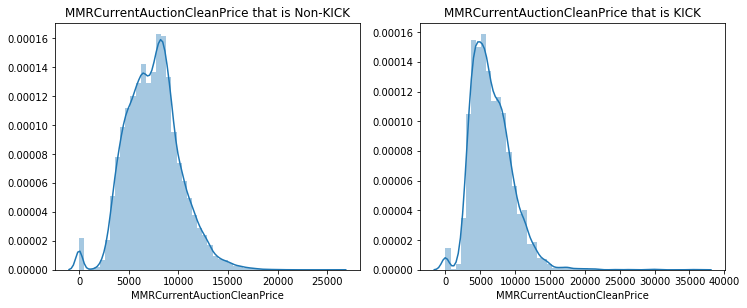

In [90]:
# replace '?' with '0'
df1['MMRCurrentAuctionCleanPrice'] = df1['MMRCurrentAuctionCleanPrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRCurrentAuctionCleanPrice'] = pd.to_numeric(df1['MMRCurrentAuctionCleanPrice'])
df1['MMRCurrentAuctionCleanPrice'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentAuctionCleanPrice'] = df1['MMRCurrentAuctionCleanPrice'].fillna((df1['MMRCurrentAuctionCleanPrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRCurrentAuctionCleanPrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentAuctionCleanPrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentAuctionCleanPrice)
plt.title('MMRCurrentAuctionCleanPrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentAuctionCleanPrice)
plt.title('MMRCurrentAuctionCleanPrice that is KICK')



####  MMRCurrentRetailAveragePrice

In [314]:
print(df1['MMRCurrentRetailAveragePrice'].isnull().values.sum())

23




Normalised count (percentage) of MMRCurrentAuctionCleanPrice with kick value prediction


Text(0.5,1,'MMRCurrentRetailAveragePrice that is KICK')

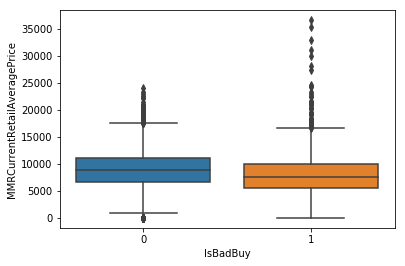

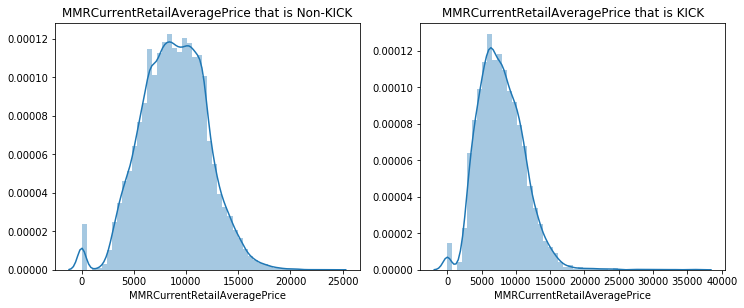

In [91]:
# replace '?' with '0'
df1['MMRCurrentRetailAveragePrice'] = df1['MMRCurrentRetailAveragePrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRCurrentRetailAveragePrice'] = pd.to_numeric(df1['MMRCurrentRetailAveragePrice'])
df1['MMRCurrentRetailAveragePrice'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentRetailAveragePrice'] = df1['MMRCurrentRetailAveragePrice'].fillna((df1['MMRCurrentRetailAveragePrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRCurrentAuctionCleanPrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentRetailAveragePrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentRetailAveragePrice)
plt.title('MMRCurrentRetailAveragePrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentRetailAveragePrice)
plt.title('MMRCurrentRetailAveragePrice that is KICK')



#### MMRCurrentRetailCleanPrice

In [189]:
print(df1['MMRCurrentRetailCleanPrice'].isnull().values.sum())

23


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """




Normalised count (percentage) of MMRCurrentRetailCleanPrice with kick value prediction


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0.5,1,'Market clean price that is KICK')

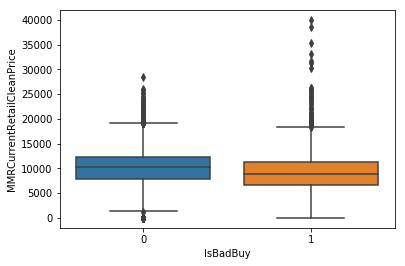

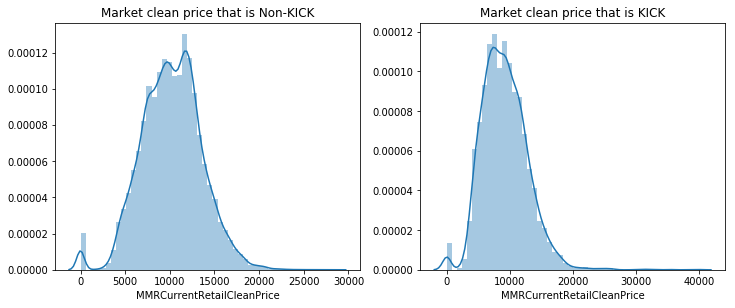

In [211]:
# replace '?' with '0'
df1['MMRCurrentRetailCleanPrice'] = df1['MMRCurrentRetailCleanPrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRCurrentRetailCleanPrice'] = pd.to_numeric(df1['MMRCurrentRetailCleanPrice'])
df1['MMRCurrentRetailCleanPrice'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentRetailCleanPrice'] = df1['MMRCurrentRetailCleanPrice'].fillna((df1['MMRCurrentRetailCleanPrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRCurrentRetailCleanPrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentRetailCleanPrice', data=df1)
#plt.show()

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentRetailCleanPrice)
plt.title('Market clean price that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentRetailCleanPrice)
plt.title('Market clean price that is KICK')

#### MMRCurrentRetailRatio

In [190]:
print(df1['MMRCurrentRetailRatio'].isnull().values.sum())

316


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """




Normalised count (percentage) of MMRCurrentRetailRatio with kick value prediction


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0.5,1,'MMRCurrentRetailRatio  that is KICK')

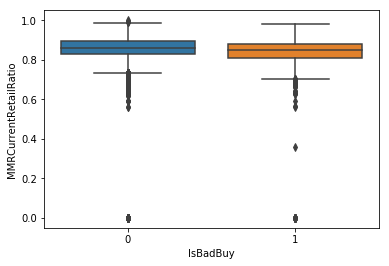

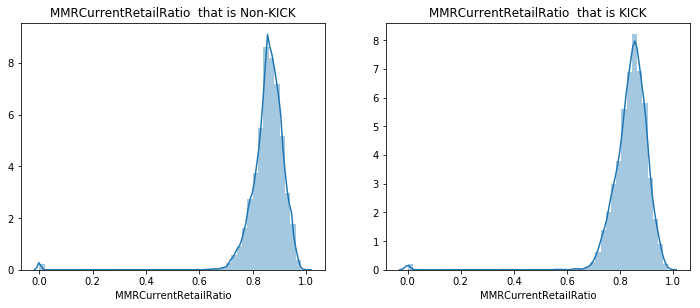

In [209]:
# replace '?' with '0'
df1['MMRCurrentRetailRatio'] = df1['MMRCurrentRetailRatio'].replace('#VALUE!', '0')

# convert data type from string to numeric
df1['MMRCurrentRetailRatio'] = pd.to_numeric(df1['MMRCurrentRetailRatio'])
df1['MMRCurrentRetailRatio'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentRetailRatio'] = df1['MMRCurrentRetailRatio'].fillna((df1['MMRCurrentRetailRatio'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRCurrentRetailRatio with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentRetailRatio', data=df1)


plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentRetailRatio)
plt.title('MMRCurrentRetailRatio  that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentRetailRatio)
plt.title('MMRCurrentRetailRatio  that is KICK')


#### PRIMEUNIT 

In [191]:
print(df1['PRIMEUNIT'].unique())
print(df1['PRIMEUNIT'].value_counts())

['?' 'NO' 'YES']
?      39634
NO      1764
YES       34
Name: PRIMEUNIT, dtype: int64


####  AUCGUART

In [ ]:
print(df1['AUCGUART'].unique())
print(df1['AUCGUART'].value_counts())

In [330]:
print(df1['AUCGUART'].unique())
print(df1['AUCGUART'].value_counts())

['?' 'GREEN' 'RED']
?        39634
GREEN     1754
RED         44
Name: AUCGUART, dtype: int64


#### VNST 

['NC' 'CA' 'TX' 'FL' 'NV' 'CO' 'NM' 'LA' 'SC' 'WV' 'TN' 'OH' 'VA' 'IN'
 'GA' 'IL' 'AZ' 'PA' 'MO' 'AL' 'MS' 'WA' 'ID' 'OK' 'NH' 'NJ' 'NY' 'NE'
 'OR' 'KY' 'UT']


Text(0.5,1,'VNST associated with kick ')

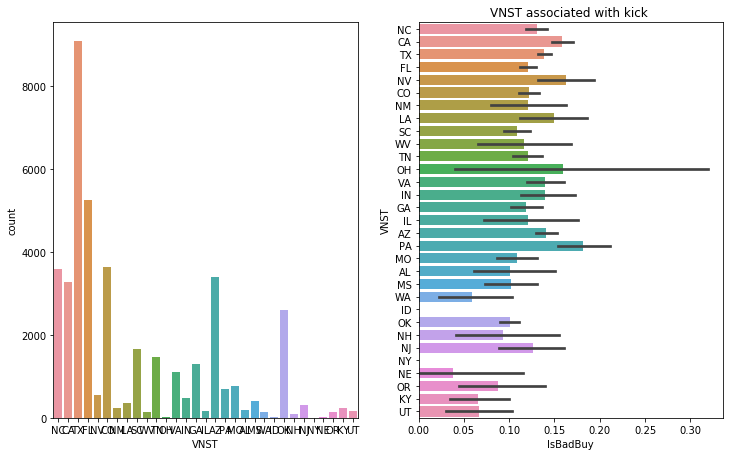

In [205]:
print(df1['VNST'].unique())
#print(df1['VNST'].value_counts())
#print("\n\nNormalised count (percentage) of VNST with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['VNST'].value_counts(normalize=True))
plt.figure(figsize=(12,16))
plt.subplot(221)
dg = sns.countplot(data=df1, x='VNST')

plt.subplot(222)
dg = sns.barplot(data=df1, y='VNST', x='IsBadBuy', )
plt.title("VNST associated with kick ")

#### VehBCost

In [192]:
print(df1['VehBCost'].isnull().values.sum())
df1['VehBCost'].unique()

0


Text(0.5,1,'Purchase cost that is KICK')

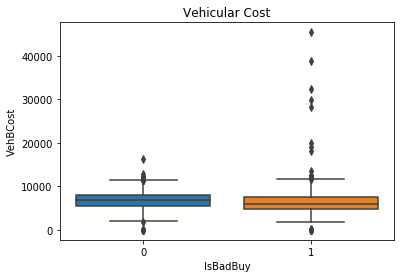

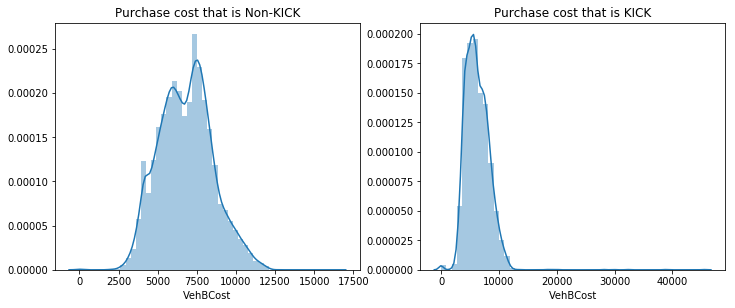

In [93]:
# replace '?' with '0'
df1['VehBCost'] = df1['VehBCost'].replace('?', '0')

# convert data type from string to numeric
df1['VehBCost'] = pd.to_numeric(df1['VehBCost'])
df1['VehBCost'].unique()

#print("\n\nNormalised count (percentage) of VehBCost with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['VehBCost'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='VehBCost', data=df1).set_title('Vehicular Cost')

# create discplots to sepate kick and non kick in terms of vehicular cost 
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].VehBCost)
plt.title('Purchase cost that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].VehBCost)
plt.title('Purchase cost that is KICK')




#### IsOnlineSale 

problems on this area

In [349]:
print(df1['IsOnlineSale'].isnull().values.sum())
print(df1['IsOnlineSale'].unique())
print(df1['IsOnlineSale'].value_counts())

0
[0.0 -1.0 2.0 4.0 1.0 '0' '1' '?']
0.0     31368
0        8572
1.0       753
-1.0      601
1         134
?           2
4.0         1
2.0         1
Name: IsOnlineSale, dtype: int64


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

[0, 1]
Categories (2, object): [0, 1]
0.0    39944
1       1488
1          0
0          0
Name: IsOnlineSale, dtype: int64


Normalised count (percentage) of IsOnlineSale with kick value prediction
IsBadBuy  IsOnlineSale
0         0.0             0.963734
          1.0             0.036266
1         0.0             0.966449
          1.0             0.033551
Name: IsOnlineSale, dtype: float64


Text(0.5,1,'IsOnlineSale associated with kick ')

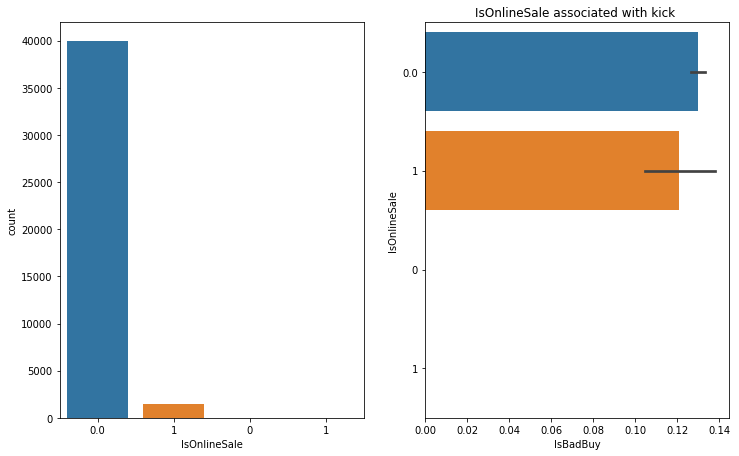

In [206]:
# replace '?' with '0'
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace('?', 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace(-1.0, 1)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( 2, 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( 4, 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( 0.0, 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( '0', 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( '1', 1)


# convert data type from string to numeric
df1['IsOnlineSale'] = pd.Categorical(df1['IsOnlineSale'])
print(df1['IsOnlineSale'].unique())
print(df1['IsOnlineSale'].value_counts())

print("\n\nNormalised count (percentage) of IsOnlineSale with kick value prediction")
print(df1.groupby(['IsBadBuy'])['IsOnlineSale'].value_counts(normalize=True))

plt.figure(figsize=(12,16))
plt.subplot(221)
dg = sns.countplot(data=df1, x='IsOnlineSale')

plt.subplot(222)
dg = sns.barplot(data=df1, y='IsOnlineSale', x='IsBadBuy', )
plt.title("IsOnlineSale associated with kick ")

#### WarrantyCost

In [77]:
print(df1['WarrantyCost'].isnull().values.sum())
#print(df1['WarrantyCost'].unique())
print(df1['WarrantyCost'].value_counts(bins=10000))

0
(919.34, 920.044]       1667
(1973.333, 1974.036]    1337
(2151.344, 2152.047]    1207
(1214.852, 1215.556]    1183
(1388.641, 1389.345]    1166
(1154.342, 1155.046]    1075
(727.961, 728.664]       958
(802.542, 803.246]       943
(1502.624, 1503.328]     889
(1242.996, 1243.7]       868
(1085.39, 1086.093]      866
(568.947, 569.651]       810
(1019.955, 1020.658]     790
(1702.447, 1703.15]      774
(982.664, 983.368]       763
(1271.844, 1272.547]     699
(1622.94, 1623.644]      687
(532.36, 533.064]        686
(852.498, 853.202]       661
(833.501, 834.204]       653
(753.994, 754.698]       627
(1762.956, 1763.66]      623
(504.92, 505.623]        617
(824.354, 825.058]       617
(670.969, 671.673]       609
(1372.458, 1373.162]     597
(1505.439, 1506.142]     574
(692.781, 693.484]       571
(1632.79, 1633.494]      567
(974.924, 975.628]       558
                        ... 
(5014.996, 5015.699]       0
(5014.292, 5014.996]       0
(5013.588, 5014.292]       0
(5012.885, 5

Text(0.5,1,'WarrantyCost that is KICK')

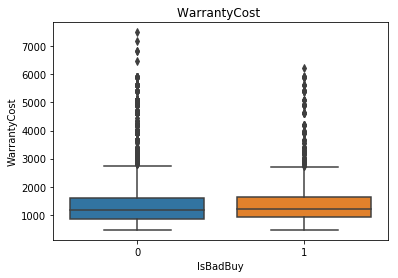

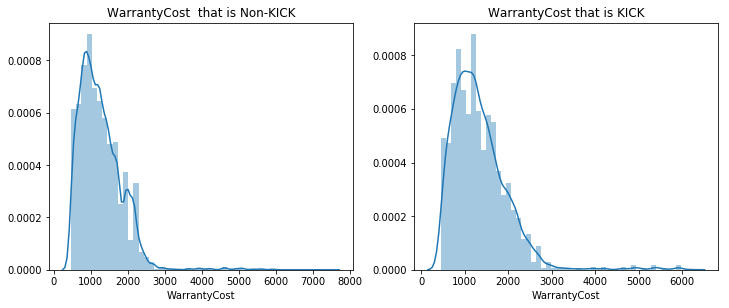

In [208]:
 #replace '?' with '0'
#df1['WarrantyCost'] = df1['WarrantyCost'].replace('?', '0')

# convert data type from string to numeric
#df1['VehBCost'] = pd.to_numeric(df1['VehBCost'])
#df1['VehBCost'].unique()

#print("\n\nNormalised count (percentage) of VehBCost with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['VehBCost'].value_counts(normalize=True))
#dg = sns.boxplot( x ='IsBadBuy', y ='WarrantyCost', data=df1)
#dg = sns.distplot(df1['WarrantyCost'])


dg = sns.boxplot( x ='IsBadBuy', y ='WarrantyCost', data=df1).set_title('WarrantyCost ')

# create discplots to sepate kick and non kick in terms of vehicular cost 
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].WarrantyCost)
plt.title('WarrantyCost  that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].WarrantyCost)
plt.title('WarrantyCost that is KICK')







#### ForSale 

In [362]:
#print(df1['IsBadBuy'].isnull().values.sum())
print(df1['ForSale'].unique())
print(df1['ForSale'].value_counts())

0
['Yes' 'No' '?' 'yes' '0' 'YES']
Yes    27358
YES     8544
yes     5524
?          3
No         2
0          1
Name: ForSale, dtype: int64


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt



Normalised count (percentage) of ForSale with kick value prediction
IsBadBuy  ForSale
0         Yes        0.999917
          No         0.000083
1         Yes        1.000000
Name: ForSale, dtype: float64


Text(0.5,1,'ForSale associated with kick ')

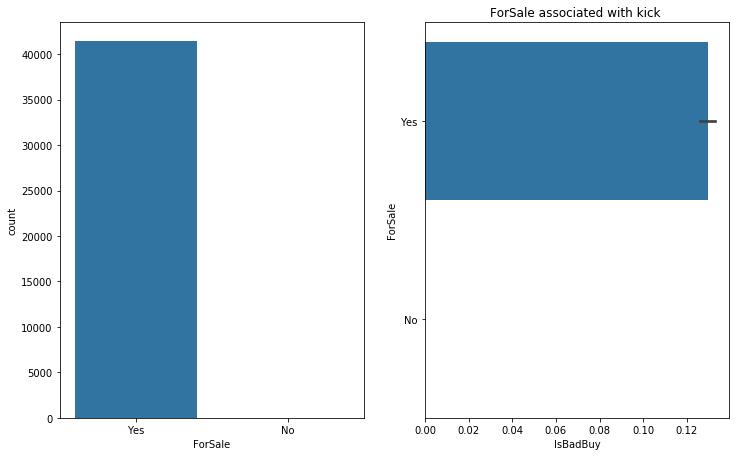

In [207]:
# replace noisy
df1['ForSale'] = df1['ForSale'].replace('yes', 'Yes')
df1['ForSale'] = df1['ForSale'].replace('YES', 'Yes')
df1['ForSale'] = df1['ForSale'].replace('?', 'Yes')
df1['ForSale'] = df1['ForSale'].replace('0', 'No')

print("\n\nNormalised count (percentage) of ForSale with kick value prediction")
print(df1.groupby(['IsBadBuy'])['ForSale'].value_counts(normalize=True))

plt.figure(figsize=(12,16))
plt.subplot(221)
dg = sns.countplot(data=df1, x='ForSale')

plt.subplot(222)
dg = sns.barplot(data=df1, y='ForSale', x='IsBadBuy', )
plt.title("ForSale associated with kick ")

#### IsBadBuy 

In [27]:
#print(df1['IsBadBuy'].isnull().values.sum())
print(df1['IsBadBuy'].unique())
print(df1['IsBadBuy'].value_counts())

[0 1]
0    36067
1     5365
Name: IsBadBuy, dtype: int64


Text(0.5,1,'Percentage of Kick')

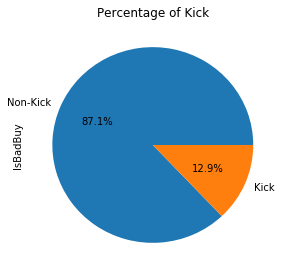

In [63]:
labels = 'Non-Kick' , 'Kick'
df1['IsBadBuy'].value_counts().plot.pie(figsize = (4.5,4.5), labels = labels,  autopct='%1.1f%%',).set_title('Percentage of Kick')
#plt.show()

#### 3. Can you identify any clear patterns by initial exploration of the data using
histogram or box plot?

#### 4. What variables did you include in the analysis and what were their roles and
measurement level set? Justify your choice.

#### 5. What distribution scheme did you use? What data partitioning allocation did you
set? Explain your selection